In [1]:
from Postprocess_functions import *

Welcome to JupyROOT 6.26/10


In [2]:
import gmsh
import sys
import os
from os.path import exists
import subprocess
import numpy as np
import time
import ROOT
from os import listdir
from os.path import isfile, join
import os.path
from os import path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
from ROOT import TFile, TTree
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev,splprep
from scipy.interpolate import BSpline
import math
def Initialization_Mult(args):
    print('Initializations')
    gen=[]
    gen_file=[]
    NSGA_files=[]
    root_folder=[]
    pictures_folder=[]
    pictures_folder_pareto=[]
    pictures_folder_filter=[]
    pictures_folder_filter_shape=[]
    
    c=0
    for fol in args.folder:
        root_folder.append(fol)
        gen.append(args.generation[c])
        print(gen)
        folder_path='ROOT/'+root_folder[c] # add path to ROOT/
        rf=os.listdir(folder_path)		# get all files in the folder
        NSGA_filenames = find_strings_containing_substring(rf, 'NSGAII_') # Get all root files
        print(rf)
        NSGA_filenames=sort_strings_by_int(NSGA_filenames)
        prefix = folder_path+'/'
        NSGA_files.append([prefix+s for s in NSGA_filenames])
        print(str(gen[c]))
        gen_file.append(folder_path+'/'+find_strings_containing_substring(rf, str(gen[c]))[0]) # Get last generation file or given gen.
        print('pictures/ROOT/'+root_folder[c]+'/Shape/')
        pictures_folder.append('pictures/ROOT/'+root_folder[c]+'/Shape/')
        print(pictures_folder)
        pictures_folder_pareto.append('pictures/ROOT/'+root_folder[c]+'/Pareto/')
        pictures_folder_filter.append('pictures/ROOT/'+root_folder[c]+'/Filter/')
        pictures_folder_filter_shape.append('pictures/ROOT/'+root_folder[c]+'/Filter/Shape_gen'+str(gen[c])+'/')

        create_folder(pictures_folder[c])  # Create required folders to store pictures
        create_folder(pictures_folder_pareto[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter_shape[c])  # Create required folders to store pictures
        c+=1
        print('### Initializations END')
    return gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape


In [3]:
# Fill the class with the required inputs:
class ArgValues:
    def __init__(self):
        self.folder = ["G11_objLC_Acte_NoYSym_SiMP_375x3_68Evts_Spline_23-02-12",
                       "G11_objLC_Acte_NoYSym_SiMPmatch3_375mm_68Evts_Spline_23-02-12",
                       "G11_objLC_Acte_NoYSym_SiMPmatch3_6mm_68Evts_Spline_23-02-12"]
        #self.folder = "G11_objLC_Acte_YSym_SiMPmatch6mm_68Evts_Spline_23-02-09"
        #self.folder ="G11_objLC_Acte_NoYSym_SiMPmatch3_6mm_68Evts_Spline_23-02-12"
        self.generation = [13,16,9]
        self.Ysym = [1,1,1]
        self.LYSOL = [1,1,1]
        self.save = 1
        self.Shape = 0
        self.ParetoFrontier = 0
        self.Filter = 1
        self.LaunchIndv = 0
        self.RootN = ['SiPM_375x3',
                     'SiPM_375xW',
                     'SiPM_600xW']
        self.Vol = '513'
        self.Job = ['JobActionNSGATestGmshPostv1.sh',
                   'JobActionNSGATestGmshPostv2.sh',
                   'JobActionNSGATestGmshPostv3.sh']
        self.Subname = ["G11_objLC_Acte_NoYSym_SiMP_375x3_68Evts_Spline",
                       "G11_objLC_Acte_NoYSym_SiMPmatch3_375mm_Spline",
                       "G11_objLC_Acte_NoYSym_SiMPmatch3_6mm_Spline"]
        
args0=ArgValues()
gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape= Initialization_Mult(args0)
gen_file
#gen, gen_file, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape = Initialization(args0)

Initializations
[13]
['NSGAII_3.root', 'NSGAII_11.root', 'NSGAII_2.root', 'NSGAII_0.root', 'NSGAII_5.root', 'NSGAII_12.root', 'NSGAII_8.root', 'NSGAII_7.root', 'NSGAII_13.root', 'NSGAII_4.root', 'NSGAII_9.root', 'NSGAII_10.root', 'NSGAII_1.root', 'NSGAII_6.root']
13
pictures/ROOT/G11_objLC_Acte_NoYSym_SiMP_375x3_68Evts_Spline_23-02-12/Shape/
['pictures/ROOT/G11_objLC_Acte_NoYSym_SiMP_375x3_68Evts_Spline_23-02-12/Shape/']
pictures/ROOT/G11_objLC_Acte_NoYSym_SiMP_375x3_68Evts_Spline_23-02-12/Shape/ already exists.
pictures/ROOT/G11_objLC_Acte_NoYSym_SiMP_375x3_68Evts_Spline_23-02-12/Pareto/ already exists.
pictures/ROOT/G11_objLC_Acte_NoYSym_SiMP_375x3_68Evts_Spline_23-02-12/Filter/ already exists.
pictures/ROOT/G11_objLC_Acte_NoYSym_SiMP_375x3_68Evts_Spline_23-02-12/Filter/Shape_gen13/ already exists.
### Initializations END
[13, 16]
['NSGAII_3.root', 'NSGAII_14.root', 'NSGAII_11.root', 'NSGAII_2.root', 'NSGAII_0.root', 'NSGAII_5.root', 'NSGAII_12.root', 'NSGAII_16.root', 'NSGAII_8.root

['ROOT/G11_objLC_Acte_NoYSym_SiMP_375x3_68Evts_Spline_23-02-12/NSGAII_13.root',
 'ROOT/G11_objLC_Acte_NoYSym_SiMPmatch3_375mm_68Evts_Spline_23-02-12/NSGAII_16.root',
 'ROOT/G11_objLC_Acte_NoYSym_SiMPmatch3_6mm_68Evts_Spline_23-02-12/NSGAII_9.root']

The number of vars per indv is :11
The number indv is :200
498.7815055011589   -17176.582089552237   -34.43708698118986
506.73282788592627   37   -17271.880597014926   -34.08478718276982
528.1266467877984   -17831.925373134327   -33.76448713881919
[19.284790246337817, 1.4484276945408063, 0.877611939143067, 0.81328296769828, 0.9090685863907878, 0.4888075010139012, 1.5638231524332074, 1.4994677337606848, 0.8784721445418151, 0.7377692055370719, 0.9620441894750561]
NoYSym
LYSOL
vars:  148   [19.284790246337817, 1.4484276945408063, 0.877611939143067, 0.81328296769828, 0.9090685863907878, 0.4888075010139012, 1.5638231524332074, 1.4994677337606848, 0.8784721445418151, 0.7377692055370719, 0.9620441894750561]
n_vars:  11
[-19.284790246337817, -14.463592684753362, -9.642395123168908, -4.821197561584455, 0.0, 4.821197561584455, 9.642395123168907, 14.463592684753362, 19.284790246337817]
[2.1726415418112097, 1.3164179087146004, 1.2199244515474201, 1.3636028795861816, 0.7332112515208518, 1.363602879

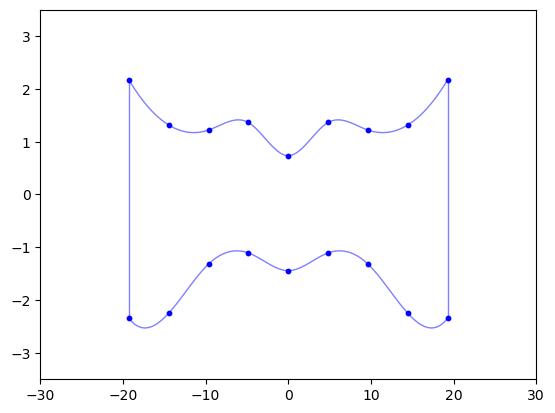

In [4]:
# Get required input for plotting the crystal shapes
idx=2
num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[idx])
obj1f,obj2f,idxf=filter_values(obj1,obj2,20)
closest, closest_index=closest_value(obj2f,int(args0.Vol))
print(obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
print(closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
original_idx = idxf[closest_index]
print(vars_tuple[original_idx])

Zhalf=28.5
Yhalf=1.5
#with original_idx as indv:	### optional variable arguments
indv = original_idx
### get spline control points for different scenarions
args=args0
if(args.Ysym[idx]==1):
	print("NoYSym")
	if (args.LYSOL[idx]==1):
		print("LYSOL")
		#print("Length:",vars_tuple)
		xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
	else:
		xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
else:
	print("YSym")
	if (args.LYSOL[idx]==1):
		print("LYSOL")
		#print("Length:",vars_tuple)
		xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
	else:
		xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)

### plot and save	
#try:
print("vars: ",indv," ",vars_tuple[indv])
print("n_vars: ",num_vars)
print(xtop)
print(ytop)
print(xbot)
print(ybot)
fig1, ax1 = plt.subplots()
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1)	
plt.show()

In [7]:
for idx in [0,1,2]:
    SubWrite(vars_tuple[original_idx], 50, 
             math.ceil(obj2f[closest_index]), 
             args0.RootN[idx], args0.generation[idx],
             JobName=args0.Job[idx],
             SubName = 'GC13_'+str(args0.generation[idx])+'_Vol_'+str(args0.Vol)+args0.Subname[idx],
             LYSOL=True)
#SubLaunch(gen)

### Writting Sub File:
### Writting Sub File:
### Writting Sub File:


# Standard configuration Subfile creation

In [6]:
SubWrite([1,1], 50, 513, "Rst_", 0, JobName='JobActionGC13mmResin.sh', SubName = 'SubFile_SingleSiPM_Na', LYSOL=False) # evt 60
SubWrite([1,1], 50, 513, "Rst_", 0, JobName='JobActionGC13mmResinMuon.sh', SubName = 'SubFile_SingleSiPM_Muon', LYSOL=False) # evt 60

SubWrite([1,1], 50, 513, "Rst_", 0, JobName='JobActionGC1FLResin.sh', SubName = 'SubFile_FL_SiPM_Na', LYSOL=False) # evt 60
SubWrite([1,1], 50, 513, "Rst_", 0, JobName='JobActionGC1FLResinMuon.sh', SubName = 'SubFile_FL_SiPM_Muon', LYSOL=False) # evt 60

SubWrite([1,1], 600, 513, "Rst_", 0, JobName='JobActionGC3.sh', SubName = 'SubFile_GC3_SiPM_Na', LYSOL=False) # evt 5
SubWrite([1,1], 600, 513, "Rst_", 0, JobName='JobActionGC3Muon.sh', SubName = 'SubFile_GC3_SiPM_Muon', LYSOL=False) # evt 5

### Writting Sub File:
### Writting Sub File:
### Writting Sub File:
### Writting Sub File:
### Writting Sub File:
### Writting Sub File:


# IncrV 1D study

In [17]:
def NSGAIIWrite_incrV( V0, Vf, num,  ROOTName, SubName ='SubFile', JobName='JobActionVolIncr.sh', Singularity='+SingularityImage="/storage/af/user/greales/SingDir/sandG4Gmsh"', SiPMS=False, LYSOL=False):
            print("### Writting Sub File:")

            f = open("SubFiles/"+SubName+"_VolIncr"+".sub", "w")
            f.write("Universe = vanilla\n")
            f.write("executable = ../../../JobFiles/"+JobName+"\n")

            f.write('arguments ="-a '+ROOTName+'IncrV_$(var)_$(Cluster)_$(Process)_ -v $(var)')
            f.write('"\n')	
            
            f.write("Output  =/storage/af/user/greales/simG4/outputs/OutPost_$(gen)_$(vol)"+".out"+"\n")
               
            f.write("Error   = /storage/af/user/greales/simG4/errors/error_job$(Cluster).out\n")
            f.write("Log     = /storage/af/user/greales/simG4/logs/log_job$(Cluster).out\n")
            f.write("requirements = Machine =!= LastRemoteHost\n")
            f.write("WHEN_TO_TRANSFER_OUTPUT = ON_EXIT_OR_EVICT\n")
            f.write('+JobQueue = "Short"\n')
            f.write("+MaxRuntime = 7000\n")
            f.write("+RunAsOwner = True\n")
            f.write("+InteractiveUser = True\n")
            f.write("+SingularityBindCVMFS = True\n")
            f.write(Singularity+"\n")
            f.write("x509userproxy = $ENV(X509_USER_PROXY)\n")
            f.write("RequestDisk = 2000000\n")
            f.write("RequestMemory = 2000\n")
            f.write("RequestCpus = 1\n")
            f.write("on_exit_remove = ((ExitBySignal == False) && (ExitCode == 0)) || (JobStatus=?=3)\n")
            f.write("on_exit_hold = (ExitBySignal == True) || (ExitCode != 0)\n")
            f.write("+PeriodicRemove = ((JobStatus =?= 2) && ((MemoryUsage =!= UNDEFINED && MemoryUsage > 2.5*RequestMemory)))\n")
            f.write("should_transfer_files = Yes\n")
            f.write("max_retries = 3\n")
            
            f.write("Queue var, \n")
            indvfeat = np.linspace(V0,Vf,num)
            cc=0                
            for y in indvfeat:
                    cmd=""
                    cmd=str(int(y))
                    cmd=cmd+", "
                    f.write(cmd+"\n")
                    cc+=1
            f.write(")\n")
            f.close()
            

In [18]:
import numpy as np
NSGAIIWrite_incrV(25,225,50,'IncrV')

### Writting Sub File:


In [ ]:
NSGAIIWrite_incrV(25,225,50)